<a href="https://colab.research.google.com/github/mdsiam135/thesis_2025/blob/main/Correlation_figure_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation of Production with other features:
Production                1.000000
Area                      0.967139
Temperature               0.106506
Year                      0.040888
soil temperature          0.027737
Root Zone Soil Wetness   -0.053226
Surface Soil Wetness     -0.056471
soil moisture            -0.057258
soil moiture             -0.059492
total rain mm            -0.063701
relative humidity 2m     -0.092408
Precipitation            -0.095229
Name: Production, dtype: float64


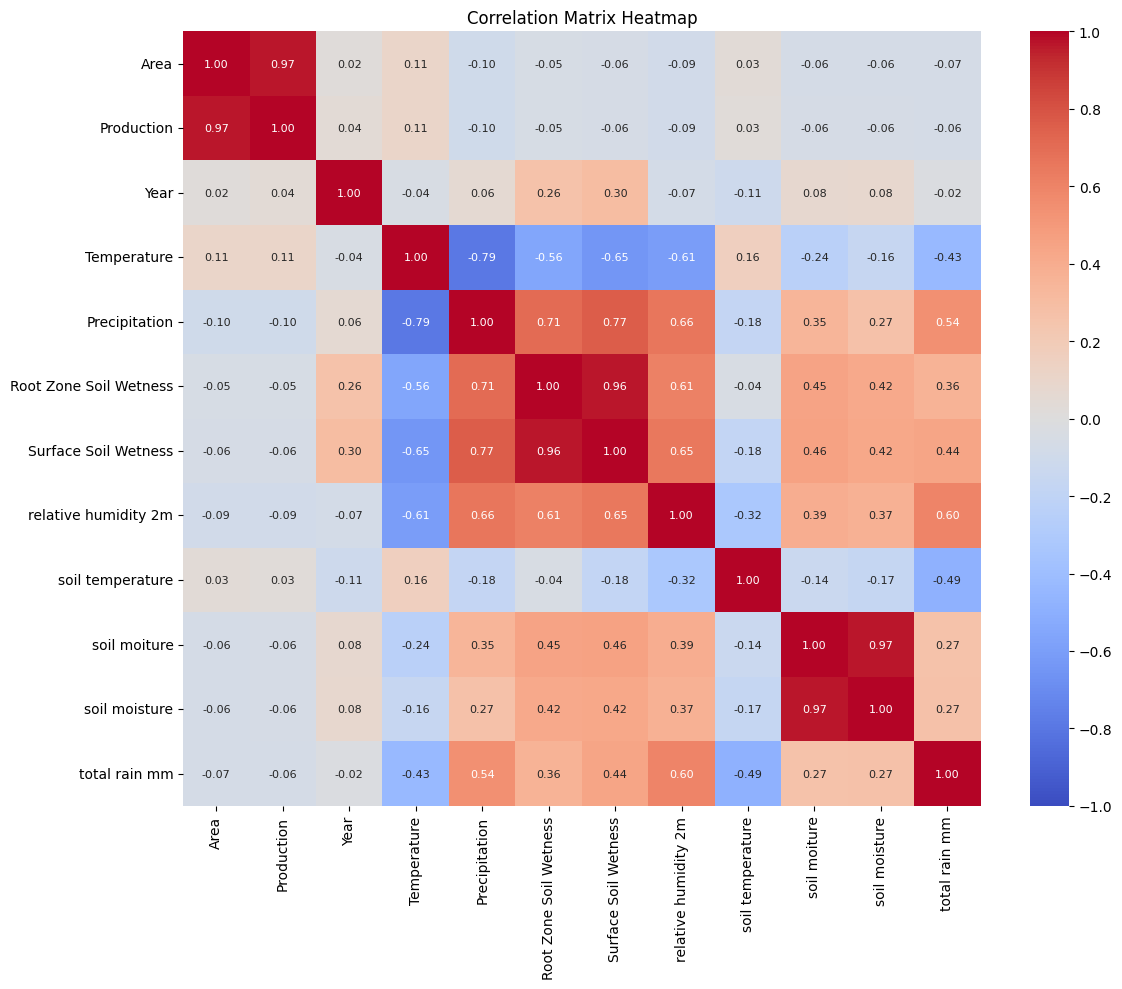

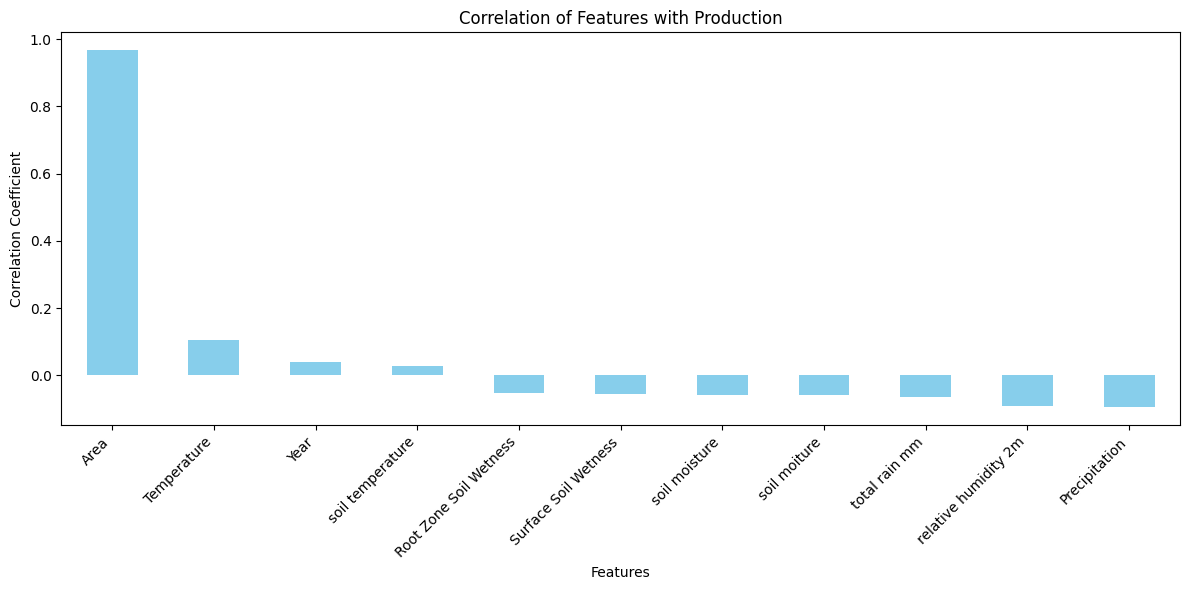


Cleaned feature names:
'Area (Acres)' -> 'Area'
'Production (M.Ton)' -> 'Production'
'Temperature at 2 Meters Range (C)' -> 'Temperature'
'Precipitation Corrected (mm)' -> 'Precipitation'
'Root Zone Soil Wetness (surface to 100 cm below)' -> 'Root Zone Soil Wetness'
'Surface Soil Wetness (surface to 5 cm below)' -> 'Surface Soil Wetness'
'relative_humidity_2m(%)' -> 'relative humidity 2m'
'soil_temperature_0_to_7cm(C)' -> 'soil temperature'
'soil_moiture_7_to_28cm(m³/m³)' -> 'soil moiture'
'soil_moisture_0_to_7cm(m³/m³)' -> 'soil moisture'
'total_rain_mm' -> 'total rain mm'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/UpdatedDataset/Dataset(2014-2024).csv', encoding='latin1')

# Function to clean feature names by removing measurement units and descriptions
def clean_feature_names(df):
    # Create a copy to avoid modifying original dataframe
    df_clean = df.copy()

    # Dictionary to map old column names to clean names
    column_mapping = {}

    for col in df_clean.columns:
        # Remove common measurement units and descriptions
        clean_name = col

        # Remove measurement units in parentheses
        clean_name = clean_name.split('(')[0].strip()

        # Remove specific descriptive text
        clean_name = clean_name.replace('Corrected', '').strip()
        clean_name = clean_name.replace('at 2 Meters Range', '').strip()
        clean_name = clean_name.replace('surface to 100 cm below', '').strip()
        clean_name = clean_name.replace('surface to 5 cm below', '').strip()
        clean_name = clean_name.replace('_0_to_7cm', '').strip()
        clean_name = clean_name.replace('_7_to_28cm', '').strip()

        # Clean up extra spaces and underscores
        clean_name = ' '.join(clean_name.split())
        clean_name = clean_name.replace('_', ' ')

        # Store the mapping
        column_mapping[col] = clean_name

    # Rename columns
    df_clean.rename(columns=column_mapping, inplace=True)

    return df_clean

# Clean the feature names
df_clean = clean_feature_names(df)

# Calculate correlation matrix
correlation_matrix = df_clean.corr(numeric_only=True)

# Get correlations with Production (assuming it's now called 'Production')
production_col = 'Production'
if production_col not in correlation_matrix.columns:
    # Find the production column with any remaining text
    production_cols = [col for col in correlation_matrix.columns if 'Production' in col]
    if production_cols:
        production_col = production_cols[0]
    else:
        print("Warning: Could not find Production column")
        production_col = correlation_matrix.columns[1]  # Use second column as fallback

production_corr = correlation_matrix[production_col].sort_values(ascending=False)

# Display the correlations
print("Correlation of Production with other features:")
print(production_corr)

# Visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'ticks': [1, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2, -0.4, -0.6, -0.8, -1]},
            annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Plot top correlations with Production
plt.figure(figsize=(12, 6))
production_corr.drop(production_col).plot(kind='bar', color='skyblue')
plt.title(f'Correlation of Features with {production_col}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the cleaned column names for reference
print("\nCleaned feature names:")
for old_name, new_name in zip(df.columns, df_clean.columns):
    if old_name != new_name:
        print(f"'{old_name}' -> '{new_name}'")